<a href="https://colab.research.google.com/github/bringol/IA_TP_GRUPO_2/blob/main/Dataset_no_me_comas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset: Yellow Submarine
----

Cada fila representa un hongo, cada columna contiene atributos de este.

La columna *classes* indica si el hongo es venenoso o no.

hongos | atributos
:----:   | :----:
8124     | 23


# Variables

Nombre   |  Posibles valores
:------- |  :---
cap-shape   | (bell, conical, convex, flat, knobbed, sunken)
cap-surface | (fibrous, grooves, scaly, smooth)
cap-color | (brown, buff, cinnamon, gray, green, pink, purple, red, white, yellow)
bruises | (bruises, no)
odor | (almond, anise, creosote, fishy, foul, musty, none, pungent, spicy)
gill-attachment | (attached, descending, free, notched)
gill-spacing | (close, crowded, distant)
gill-size | (broad, narrow)
gill-color | (black, brown, buff, chocolate, gray, green, orange, pink, purple, red, white, yellow)
stalk-shape | (enlarging, tapering)
stalk-root | (bulbous, club, cup, equal, rhizomorphs, rooted, missing)
stalk-surface-above-ring | (fibrous, scaly, silky, smooth)
stalk-surface-below-ring | (fibrous, scaly, silky, smooth)
stalk-color-above-ring | (brown, buff, cinnamon, gray, orange, pink, red, white, yellow)
stalk-color-below-ring | (brown, buff, cinnamon, gray, orange, pink, red, white, yellow)
veil-type | (partial, universal)
veil-color | (brown, orange, white, yellow)
ring-number | (none, one, two)
ring-type | (cobwebby, evanescent, flaring, large, none, pendant, sheathing, zone)
spore-print-color | (black, brown, buff, chocolate, green, orange, purple, white, yellow)
population | (abundant, clustered, numerous, scattered ,several, solitary)
habitat | (grasses, leaves, meadows, paths, urban, waste, woods)
classes   |  (edible, poisonous)

In [21]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.4 MB/s eta 0:00:00


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns
import optuna

# Cargar los datos
mushroom_data = pd.read_csv('Yellow_Submarine.csv')

In [2]:
# Verificar valores faltantes
missing_values = mushroom_data.isnull().sum()
print("Valores faltantes en cada columna:")
print(missing_values)

Valores faltantes en cada columna:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [3]:
# Convertir todas las categorías a minúsculas
for col in mushroom_data.select_dtypes(include=['object']).columns:
    mushroom_data[col] = mushroom_data[col].str.lower()

In [4]:
# Verificar la distribución de valores en la columna "veil-type"
veil_type_distribution = mushroom_data['veil-type'].value_counts()
print(veil_type_distribution)

# Remover la columna 'veil-type'
mushroom_data.drop(columns=['veil-type'], inplace=True)

veil-type
partial    8124
Name: count, dtype: int64


In [5]:
# Cheqeuar la distribución de clases
class_distribution = mushroom_data['class'].value_counts()
print(class_distribution)

class
edible     4208
poisson    3916
Name: count, dtype: int64


#Cambiar "poisson" por "poisonous"

In [5]:
# Original
print(mushroom_data['class'].value_counts())

# Cambiar el nombre 'poisson' a 'poisonous' en la columna 'class'
mushroom_data['class'] = mushroom_data['class'].replace({'poisson': 'poisonous'})

# Verificar que el cambio se haya realizado
print(mushroom_data['class'].value_counts())

class
edible     4208
poisson    3916
Name: count, dtype: int64
class
edible       4208
poisonous    3916
Name: count, dtype: int64


In [7]:
# Lista de columnas a verificar
columns_to_check = [
    'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population',
    'habitat'
]

# Verificar la distribución de "edible" y "poisonous" para cada categoría en cada columna
for column in columns_to_check:
    print(f"Distribución de 'class' para cada valor en '{column}':")
    distribution = mushroom_data.groupby([column, 'class']).size().unstack(fill_value=0)
    print(distribution)
    print("\n")

Distribución de 'class' para cada valor en 'cap-shape':
class      edible  poisonous
cap-shape                   
bell          404         48
conical         0          4
convex       1948       1708
flat         1596       1556
knobbed       228        600
sunken         32          0


Distribución de 'class' para cada valor en 'cap-surface':
class        edible  poisonous
cap-surface                   
fibrous        1560        760
grooves           0          4
scaly          1504       1740
smooth         1144       1412


Distribución de 'class' para cada valor en 'cap-color':
class      edible  poisonous
cap-color                   
brown        1264       1020
buff           48        120
cinnamon       32         12
gray         1032        808
green          16          0
pink           56         88
purple         16          0
red           624        876
white         720        320
yellow        400        672


Distribución de 'class' para cada valor en 'bruises':
clas

#Consolidar columnas agrupando categorías en "other"

1.   Función para Consolidar Categorías Escasas: La función consolidate_categories agrupa categorías con baja frecuencia en "other".
2.   Aplicar la Consolidación: Se aplica la consolidación a las columnas especificadas.
3.   Verificar la Distribución Después de la Consolidación: Se imprime la distribución de valores en cada columna especificada después de la consolidación, agrupada por la clase (class).
4.   Resultado Esperado
El resultado mostrará la distribución de edible y poisonous para cada valor en las columnas especificadas, después de que las categorías escasas se hayan consolidado en "other".




In [6]:
# Función para consolidar categorías escasas
def consolidate_categories(df, column, min_count=50):
    value_counts = df[column].value_counts()
    to_consolidate = value_counts[value_counts < min_count].index
    df[column] = df[column].apply(lambda x: 'other' if x in to_consolidate else x)
    return df

# Especificar las columnas a consolidar
columns_to_consolidate = [
    'cap-shape', 'cap-color', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'ring-type', 'spore-print-color'
]

# Aplicar la consolidación a las columnas específicas
for column in columns_to_consolidate:
    mushroom_data = consolidate_categories(mushroom_data, column, min_count=50)

# Verificar la distribución después de la consolidación
for column in mushroom_data.columns:
    if column != 'class':
        print(f"Distribución de 'class' para cada valor en '{column}':")
        distribution = mushroom_data.groupby([column, 'class']).size().unstack(fill_value=0)
        print(distribution)
        print("\n")

Distribución de 'class' para cada valor en 'cap-shape':
class      edible  poisonous
cap-shape                   
bell          404         48
convex       1948       1708
flat         1596       1556
knobbed       228        600
other          32          4


Distribución de 'class' para cada valor en 'cap-surface':
class        edible  poisonous
cap-surface                   
fibrous        1560        760
grooves           0          4
scaly          1504       1740
smooth         1144       1412


Distribución de 'class' para cada valor en 'cap-color':
class      edible  poisonous
cap-color                   
brown        1264       1020
buff           48        120
gray         1032        808
other          64         12
pink           56         88
red           624        876
white         720        320
yellow        400        672


Distribución de 'class' para cada valor en 'bruises':
class    edible  poisonous
bruises                   
bruises    2752        624
no        

#One-Hot-Encoding

In [7]:
# Aplicar One-Hot Encoding
mushroom_data_encoded = pd.get_dummies(mushroom_data, drop_first=True)

# Verificar el resultado
print(mushroom_data_encoded.head())

# Mostrar la cantidad de columnas después de One-Hot Encoding
print("Cantidad de columnas después de One-Hot Encoding:", mushroom_data_encoded.shape[1])

   class_poisonous  cap-shape_convex  cap-shape_flat  cap-shape_knobbed  \
0             True              True           False              False   
1            False              True           False              False   
2            False             False           False              False   
3             True              True           False              False   
4            False              True           False              False   

   cap-shape_other  cap-surface_grooves  cap-surface_scaly  \
0            False                False              False   
1            False                False              False   
2            False                False              False   
3            False                False               True   
4            False                False              False   

   cap-surface_smooth  cap-color_buff  cap-color_gray  ...  \
0                True           False           False  ...   
1                True           False           Fals

#Separación de Características

In [8]:
# Separar las características (X) y la variable objetivo (y)
X = mushroom_data_encoded.drop('class_poisonous', axis=1)
y = mushroom_data_encoded['class_poisonous']

#División de Datos

In [9]:
# Dividir los datos en conjuntos de entrenamiento y prueba antes de aplicar PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Escalado de Características

In [10]:
# Escalar las características solo en el conjunto de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Aplicación de PCA (Análisis de Componentes Principales)

Para reducir la dimensionalidad del dataset después de ralizar One-Hot-Encoding

In [11]:
# Aplicar PCA solo en el conjunto de entrenamiento
pca = PCA(n_components=0.95)  # Retener el 95% de la variación
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Verificar la nueva forma de los datos después de PCA
print(f"Forma original de X: {X.shape}")
print(f"Forma de X después de PCA: {X_train_pca.shape}")


'''
# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=0.95)  # Retener el 95% de la variación
X_pca = pca.fit_transform(X_scaled)

# Verificar la nueva forma de los datos después de PCA
print(f"Forma original de X: {X.shape}")
print(f"Forma de X después de PCA: {X_pca.shape}")

# Imprimir la cantidad de varianza explicada por cada componente principal
print(f"Varianza explicada por cada componente principal: {pca.explained_variance_ratio_}")
print(f"Varianza explicada acumulada: {pca.explained_variance_ratio_.cumsum()}")
'''


Forma original de X: (8124, 86)
Forma de X después de PCA: (6499, 50)


'\n# Escalar las características\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)\n\n# Aplicar PCA\npca = PCA(n_components=0.95)  # Retener el 95% de la variación\nX_pca = pca.fit_transform(X_scaled)\n\n# Verificar la nueva forma de los datos después de PCA\nprint(f"Forma original de X: {X.shape}")\nprint(f"Forma de X después de PCA: {X_pca.shape}")\n\n# Imprimir la cantidad de varianza explicada por cada componente principal\nprint(f"Varianza explicada por cada componente principal: {pca.explained_variance_ratio_}")\nprint(f"Varianza explicada acumulada: {pca.explained_variance_ratio_.cumsum()}")\n'

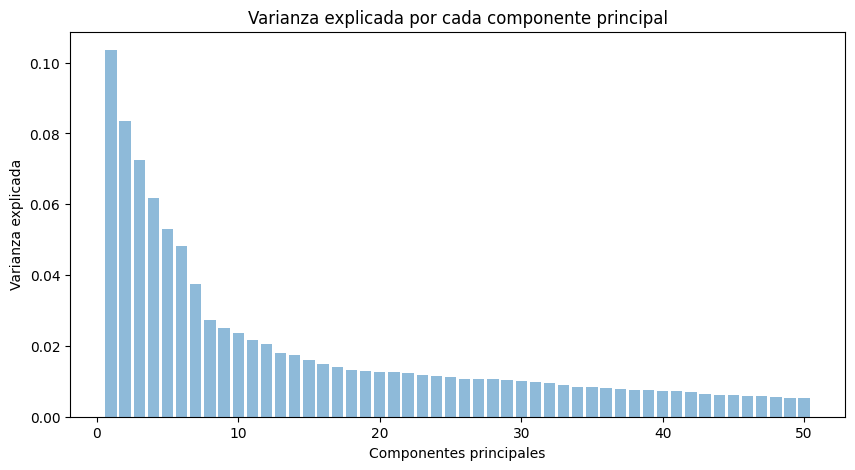

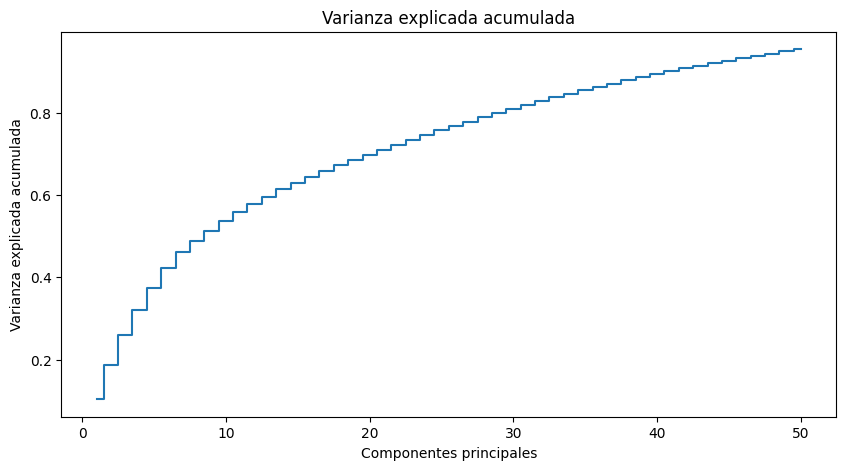

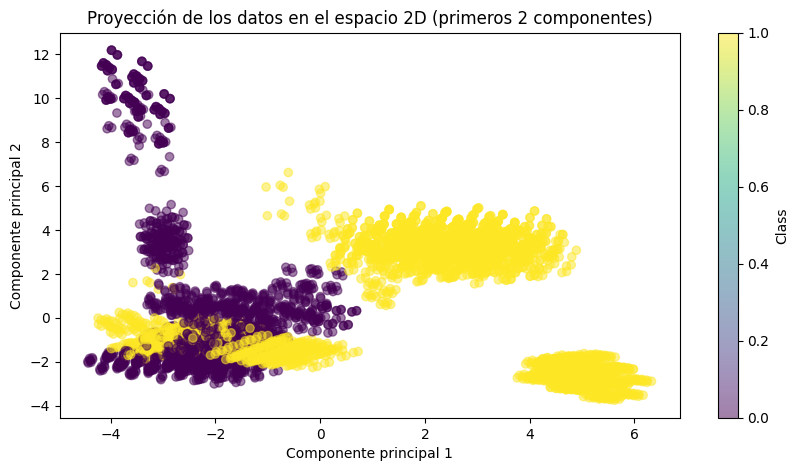

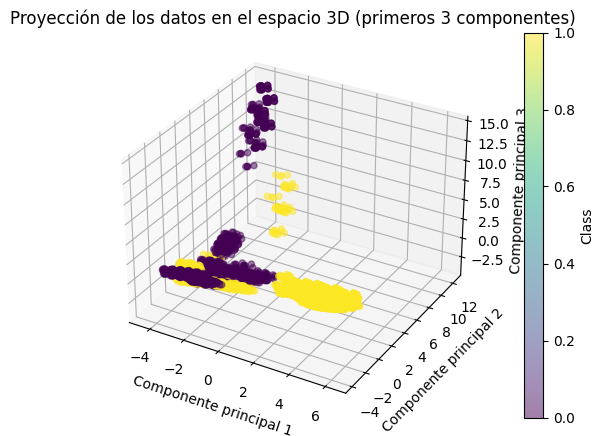

In [ ]:
# Gráfico de varianza explicada por cada componente principal
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.xlabel('Componentes principales')
plt.ylabel('Varianza explicada')
plt.title('Varianza explicada por cada componente principal')
plt.show()

# Gráfico de varianza explicada acumulada
plt.figure(figsize=(10, 5))
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), where='mid')
plt.xlabel('Componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada')
plt.show()

# Gráfico de proyección en el espacio 2D
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Proyección de los datos en el espacio 2D (primeros 2 componentes)')
plt.colorbar(label='Class')
plt.show()

# Gráfico en 3D (requiere mpl_toolkits.mplot3d)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', alpha=0.5)
ax.set_xlabel('Componente principal 1')
ax.set_ylabel('Componente principal 2')
ax.set_zlabel('Componente principal 3')
ax.set_title('Proyección de los datos en el espacio 3D (primeros 3 componentes)')
fig.colorbar(scatter, ax=ax, label='Class')
plt.show()

#Entrenamiento y Evaluación de Modelos

 División de Modelos

#Random Forest

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_pca, y_train)
y_pred_rf = rf_clf.predict(X_test_pca)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Exactitud de Random Forest: {accuracy_rf:.4f}")
print("Reporte de clasificación de Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Matriz de confusión de Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))


Exactitud de Random Forest: 1.0000
Reporte de clasificación de Random Forest:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       843
        True       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Matriz de confusión de Random Forest:
[[843   0]
 [  0 782]]


#SVM

In [ ]:
# Support Vector Machine (SVM)
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_pca, y_train)
y_pred_svm = svm_clf.predict(X_test_pca)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Exactitud de SVM: {accuracy_svm:.4f}")
print("Reporte de clasificación de SVM:")
print(classification_report(y_test, y_pred_svm))
print("Matriz de confusión de SVM:")
print(confusion_matrix(y_test, y_pred_svm))

Exactitud de SVM: 1.0000
Reporte de clasificación de SVM:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       843
        True       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Matriz de confusión de SVM:
[[843   0]
 [  0 782]]


#KNN

In [ ]:
# Implementar K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Exactitud de K-Nearest Neighbors: {accuracy_knn:.4f}")
print("Reporte de clasificación de K-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))
print("Matriz de confusión de K-Nearest Neighbors:")
print(confusion_matrix(y_test, y_pred_knn))

Exactitud de K-Nearest Neighbors: 1.0000
Reporte de clasificación de K-Nearest Neighbors:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       843
        True       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Matriz de confusión de K-Nearest Neighbors:
[[843   0]
 [  0 782]]


#Validación cruzada estratificada para los nuevos algoritmos


In [23]:
# Escalar las características y aplicar PCA dentro de un pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])

X_pca = pipeline.fit_transform(X)

# Definir los modelos a evaluar
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Realizar validación cruzada estratificada para cada modelo
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    scores = cross_val_score(model, X_pca, y, cv=cv)
    print(f"Validación cruzada para {model_name}")
    print(f"Scores: {scores}")
    print(f"Promedio: {scores.mean():.4f}")
    print(f"Desviación estándar: {scores.std():.4f}")
    print("\n")

Validación cruzada para Logistic Regression
Scores: [1.         0.99938462 1.         0.99876923 0.99938424]
Promedio: 0.9995
Desviación estándar: 0.0005


Validación cruzada para Random Forest
Scores: [1.         0.99938462 1.         0.99876923 0.99938424]
Promedio: 0.9995
Desviación estándar: 0.0005


Validación cruzada para SVM
Scores: [1.         0.99938462 1.         0.99876923 0.99938424]
Promedio: 0.9995
Desviación estándar: 0.0005


Validación cruzada para KNN
Scores: [1.         0.99938462 1.         0.99876923 0.99938424]
Promedio: 0.9995
Desviación estándar: 0.0005




#Conjunto de prueba

In [ ]:
# Implementar K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Exactitud de K-Nearest Neighbors en conjunto de prueba: {accuracy_knn:.4f}")
print("Reporte de clasificación de K-Nearest Neighbors en conjunto de prueba:")
print(classification_report(y_test, y_pred_knn))
print("Matriz de confusión de K-Nearest Neighbors en conjunto de prueba:")
print(confusion_matrix(y_test, y_pred_knn))

Exactitud de K-Nearest Neighbors en conjunto de prueba: 1.0000
Reporte de clasificación de K-Nearest Neighbors en conjunto de prueba:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       843
        True       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Matriz de confusión de K-Nearest Neighbors en conjunto de prueba:
[[843   0]
 [  0 782]]


#Pruebas adicionales

In [ ]:
# Dividir los datos en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separar una porción del conjunto de prueba para un test adicional (50/50)
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test1_scaled = scaler.transform(X_test1)
X_test2_scaled = scaler.transform(X_test2)

# Aplicar PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test1_pca = pca.transform(X_test1_scaled)
X_test2_pca = pca.transform(X_test2_scaled)

# Entrenar y evaluar el modelo en el primer conjunto de prueba
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
y_pred_test1 = knn.predict(X_test1_pca)
accuracy_test1 = accuracy_score(y_test1, y_pred_test1)
print(f"Exactitud de KNN en el primer conjunto de prueba: {accuracy_test1:.4f}")
print("Reporte de clasificación de KNN en el primer conjunto de prueba:")
print(classification_report(y_test1, y_pred_test1))
print("Matriz de confusión de KNN en el primer conjunto de prueba:")
print(confusion_matrix(y_test1, y_pred_test1))

# Evaluar el modelo en el segundo conjunto de prueba adicional
y_pred_test2 = knn.predict(X_test2_pca)
accuracy_test2 = accuracy_score(y_test2, y_pred_test2)
print(f"Exactitud de KNN en el segundo conjunto de prueba adicional: {accuracy_test2:.4f}")
print("Reporte de clasificación de KNN en el segundo conjunto de prueba adicional:")
print(classification_report(y_test2, y_pred_test2))
print("Matriz de confusión de KNN en el segundo conjunto de prueba adicional:")
print(confusion_matrix(y_test2, y_pred_test2))


Exactitud de KNN en el primer conjunto de prueba: 1.0000
Reporte de clasificación de KNN en el primer conjunto de prueba:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       413
        True       1.00      1.00      1.00       399

    accuracy                           1.00       812
   macro avg       1.00      1.00      1.00       812
weighted avg       1.00      1.00      1.00       812

Matriz de confusión de KNN en el primer conjunto de prueba:
[[413   0]
 [  0 399]]
Exactitud de KNN en el segundo conjunto de prueba adicional: 1.0000
Reporte de clasificación de KNN en el segundo conjunto de prueba adicional:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       430
        True       1.00      1.00      1.00       383

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       81

#Verificación de Distribución de Clases

In [ ]:
# Verificar la distribución de clases en los conjuntos de entrenamiento y prueba
print("Distribución de clases en el conjunto de entrenamiento:")
print(y_train.value_counts())

print("Distribución de clases en el primer conjunto de prueba:")
print(y_test1.value_counts())

print("Distribución de clases en el segundo conjunto de prueba adicional:")
print(y_test2.value_counts())


Distribución de clases en el conjunto de entrenamiento:
class_poisonous
False    3365
True     3134
Name: count, dtype: int64
Distribución de clases en el primer conjunto de prueba:
class_poisonous
False    413
True     399
Name: count, dtype: int64
Distribución de clases en el segundo conjunto de prueba adicional:
class_poisonous
False    430
True     383
Name: count, dtype: int64


#Verificar Fuga de Datos

In [ ]:
# Revisar las correlaciones entre las características y la variable objetivo
corr_matrix = mushroom_data_encoded.corr()
print(corr_matrix['class_poisonous'].sort_values(ascending=False))


class_poisonous                    1.000000
odor_foul                          0.623842
stalk-surface-above-ring_silky     0.587658
stalk-surface-below-ring_silky     0.573524
gill-size_narrow                   0.540024
                                     ...   
spore-print-color_brown           -0.416645
stalk-surface-below-ring_smooth   -0.425444
stalk-surface-above-ring_smooth   -0.491314
ring-type_pendant                 -0.540469
odor_none                         -0.785557
Name: class_poisonous, Length: 87, dtype: float64


#Optimización Random Forest

In [24]:
# Crear un pipeline que incluye el escalado de características y la aplicación de PCA
def create_pipeline(max_depth, min_samples_split, n_estimators):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('clf', RandomForestClassifier(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            n_estimators=n_estimators,
            random_state=42))
    ])

# Función de objetivo para optimización bayesiana
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 2, 22)
    min_samples_split = trial.suggest_int('min_samples_split', 10, 200)
    n_estimators = trial.suggest_int('n_estimators', 50, 500)

    pipeline = create_pipeline(max_depth, min_samples_split, n_estimators)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')

    return scores.mean()

# Crear un estudio y optimizar los hiperparámetros
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Imprimir los mejores parámetros y el mejor score
print("Mejores parámetros encontrados por Optuna:")
print(study.best_params)
print(f"Mejor score de validación: {study.best_value:.4f}")

# Visualizar la importancia de los hiperparámetros
optuna.visualization.plot_param_importances(study)
plt.show()

# Visualizar la historia de optimización
optuna.visualization.plot_optimization_history(study)
plt.show()

[I 2024-06-18 17:40:33,904] A new study created in memory with name: no-name-e4be5366-1b29-4c4d-80a4-70329afae79d
[I 2024-06-18 17:41:22,899] Trial 0 finished with value: 0.9992614626752558 and parameters: {'max_depth': 17, 'min_samples_split': 144, 'n_estimators': 195}. Best is trial 0 with value: 0.9992614626752558.
[I 2024-06-18 17:42:38,627] Trial 1 finished with value: 0.9992614626752558 and parameters: {'max_depth': 22, 'min_samples_split': 161, 'n_estimators': 430}. Best is trial 0 with value: 0.9992614626752558.
[I 2024-06-18 17:43:42,115] Trial 2 finished with value: 0.9992614626752558 and parameters: {'max_depth': 14, 'min_samples_split': 80, 'n_estimators': 356}. Best is trial 0 with value: 0.9992614626752558.
[I 2024-06-18 17:45:02,387] Trial 3 finished with value: 0.9993845395983326 and parameters: {'max_depth': 15, 'min_samples_split': 14, 'n_estimators': 460}. Best is trial 3 with value: 0.9993845395983326.
[I 2024-06-18 17:45:33,406] Trial 4 finished with value: 0.99864

Mejores parámetros encontrados por Optuna:
{'max_depth': 14, 'min_samples_split': 55, 'n_estimators': 416}
Mejor score de validación: 0.9995


#Optimización SVM



[I 2024-06-18 18:53:59,303] A new study created in memory with name: no-name-6e5df335-1e24-4bdc-af0a-b5954a2e50f1
<ipython-input-26-0ad5baf747b0>:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-26-0ad5baf747b0>:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-06-18 18:54:08,659] Trial 0 finished with value: 0.7634159151193634 and parameters: {'C': 0.02735090415663325, 'kernel': 'sigmoid', 'gamma': 5.512946553369796}. Best is trial 0 with value: 0.7634159151193634.
<ipython-input-26-0ad5baf747b0>:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rele

Mejores parámetros encontrados por Optuna para SVM:
{'C': 72.4650505109439, 'kernel': 'poly', 'gamma': 0.038527595905536574}
Mejor score de validación para SVM: 1.0000


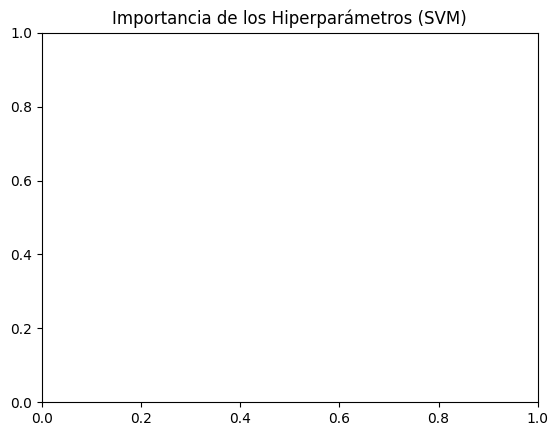

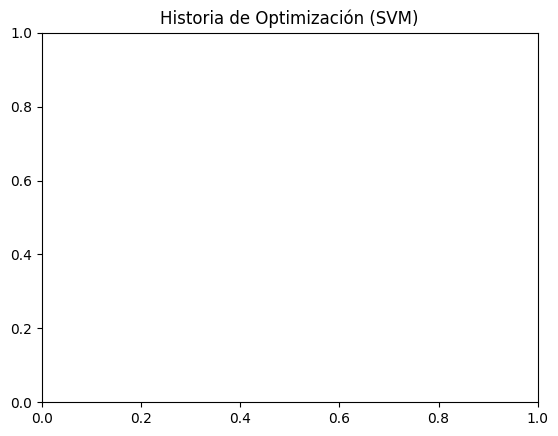

In [26]:
# Crear un pipeline que incluye el escalado de características y la aplicación de PCA
def create_pipeline_svm(C, kernel, gamma):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('clf', SVC(C=C, kernel=kernel, gamma=gamma, random_state=42))
    ])

# Función de objetivo para optimización bayesiana
def objective_svm(trial):
    C = trial.suggest_loguniform('C', 1e-5, 1e2)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid'])
    gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)

    pipeline = create_pipeline_svm(C, kernel, gamma)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')

    return scores.mean()

# Crear un estudio y optimizar los hiperparámetros
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=50)

# Imprimir los mejores parámetros y el mejor score
print("Mejores parámetros encontrados por Optuna para SVM:")
print(study_svm.best_params)
print(f"Mejor score de validación para SVM: {study_svm.best_value:.4f}")

# Visualizar la importancia de los hiperparámetros
optuna.visualization.plot_param_importances(study_svm)
plt.title("Importancia de los Hiperparámetros (SVM)")
plt.show()

# Visualizar la historia de optimización
optuna.visualization.plot_optimization_history(study_svm)
plt.title("Historia de Optimización (SVM)")
plt.show()


#Optimización KNN

[I 2024-06-18 19:03:34,539] A new study created in memory with name: no-name-8d467fe3-8c70-4175-aa0f-54517b6d223b
[I 2024-06-18 19:03:36,154] Trial 0 finished with value: 0.9987688518378173 and parameters: {'n_neighbors': 11, 'p': 2}. Best is trial 0 with value: 0.9987688518378173.
[I 2024-06-18 19:03:37,731] Trial 1 finished with value: 0.9996307692307692 and parameters: {'n_neighbors': 3, 'p': 2}. Best is trial 1 with value: 0.9996307692307692.
[I 2024-06-18 19:03:43,893] Trial 2 finished with value: 0.9990152330428194 and parameters: {'n_neighbors': 14, 'p': 1}. Best is trial 1 with value: 0.9996307692307692.
[I 2024-06-18 19:03:45,408] Trial 3 finished with value: 0.9996307692307692 and parameters: {'n_neighbors': 3, 'p': 2}. Best is trial 1 with value: 0.9996307692307692.
[I 2024-06-18 19:03:47,054] Trial 4 finished with value: 0.9981534672224328 and parameters: {'n_neighbors': 24, 'p': 2}. Best is trial 1 with value: 0.9996307692307692.
[I 2024-06-18 19:03:48,612] Trial 5 finishe

Mejores parámetros encontrados por Optuna para KNN:
{'n_neighbors': 1, 'p': 2}
Mejor score de validación para KNN: 0.9999


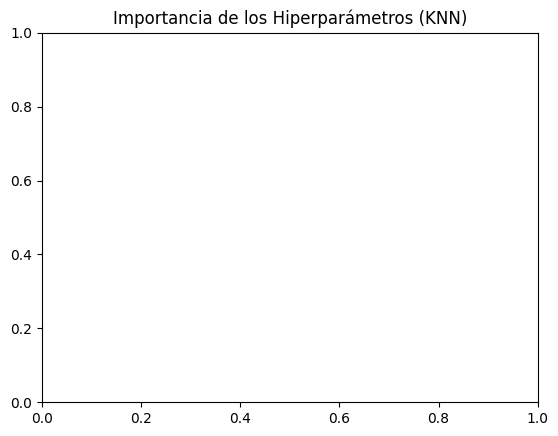

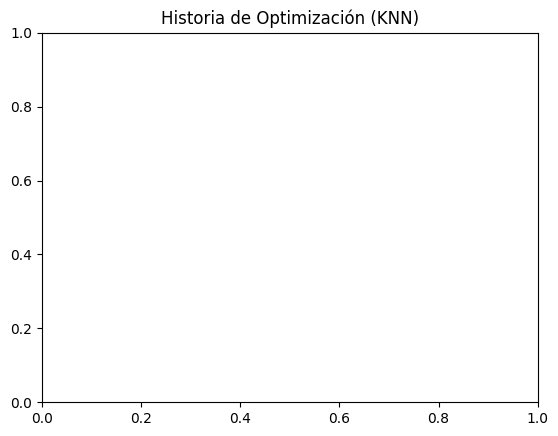

In [28]:
# Crear un pipeline que incluye el escalado de características y la aplicación de PCA
def create_pipeline_knn(n_neighbors, p):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('clf', KNeighborsClassifier(n_neighbors=n_neighbors, p=p))
    ])

# Función de objetivo para optimización bayesiana
def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 30)
    p = trial.suggest_int('p', 1, 2)

    pipeline = create_pipeline_knn(n_neighbors, p)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')

    return scores.mean()

# Crear un estudio y optimizar los hiperparámetros
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=50)

# Imprimir los mejores parámetros y el mejor score
print("Mejores parámetros encontrados por Optuna para KNN:")
print(study_knn.best_params)
print(f"Mejor score de validación para KNN: {study_knn.best_value:.4f}")

# Visualizar la importancia de los hiperparámetros
optuna.visualization.plot_param_importances(study_knn)
plt.title("Importancia de los Hiperparámetros (KNN)")
plt.show()

# Visualizar la historia de optimización
optuna.visualization.plot_optimization_history(study_knn)
plt.title("Historia de Optimización (KNN)")
plt.show()


#-------------------------------------------------------------

In [ ]:
from sklearn.model_selection import cross_val_score

# Definir el modelo de Random Forest
rf_clf = RandomForestClassifier(random_state=42)

# Realizar validación cruzada
scores = cross_val_score(rf_clf, X_pca, y, cv=5)

# Imprimir los resultados de la validación cruzada
print(f"Scores de validación cruzada: {scores}")
print(f"Promedio de validación cruzada: {scores.mean():.4f}")
print(f"Desviación estándar de validación cruzada: {scores.std():.4f}")


Scores de validación cruzada: [0.83938462 1.         0.99138462 1.         0.70135468]
Promedio de validación cruzada: 0.9064
Desviación estándar de validación cruzada: 0.1194


In [ ]:
# Análisis de la importancia de características usando Random Forest
rf_clf.fit(X, y)
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Imprimir las características más importantes
print("Características más importantes:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {X.columns[indices[f]]} ({importances[indices[f]]:.4f})")


Características más importantes:
1. odor_none (0.1281)
2. odor_foul (0.1045)
3. gill-size_narrow (0.0920)
4. stalk-surface-above-ring_silky (0.0524)
5. stalk-surface-below-ring_silky (0.0517)
6. gill-color_buff (0.0448)
7. stalk-surface-above-ring_smooth (0.0373)
8. bruises_no (0.0371)
9. ring-type_pendant (0.0344)
10. spore-print-color_chocolate (0.0339)
11. population_several (0.0267)
12. odor_pungent (0.0235)
13. gill-spacing_crowded (0.0224)
14. spore-print-color_white (0.0204)
15. ring-type_large (0.0191)
16. stalk-root_club (0.0183)
17. stalk-shape_tapering (0.0173)
18. spore-print-color_brown (0.0151)
19. odor_creosote (0.0140)
20. stalk-root_equal (0.0130)
21. odor_fishy (0.0110)
22. stalk-color-above-ring_white (0.0103)
23. odor_spicy (0.0102)
24. stalk-surface-below-ring_smooth (0.0100)
25. habitat_woods (0.0097)
26. spore-print-color_green (0.0089)
27. odor_anise (0.0079)
28. cap-color_yellow (0.0076)
29. habitat_urban (0.0072)
30. ring-number_one (0.0069)
31. stalk-root_mis

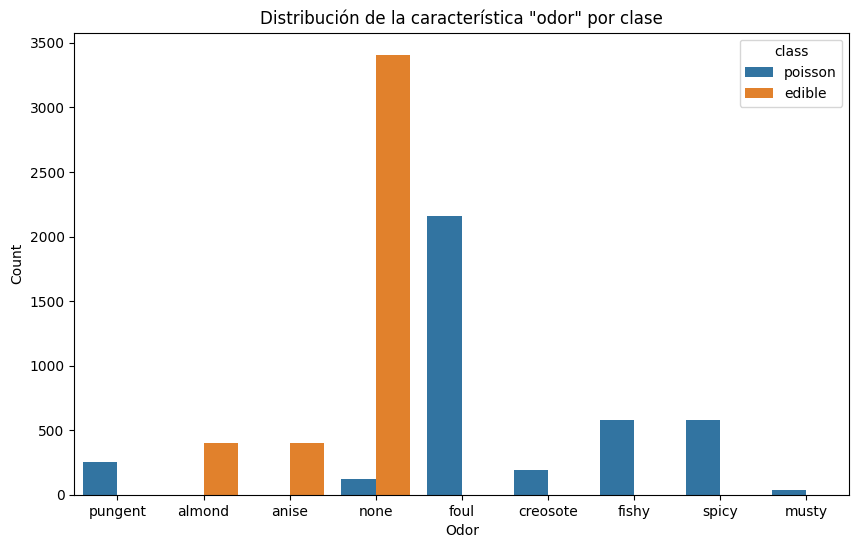

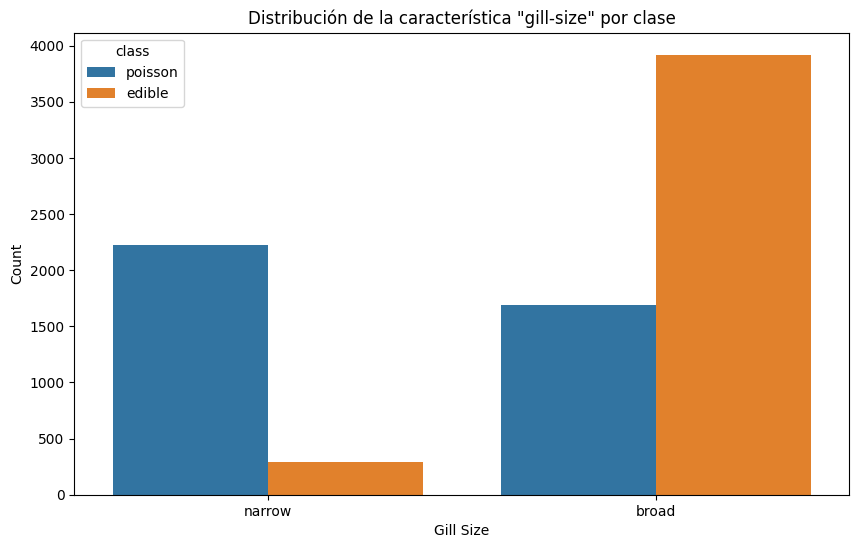

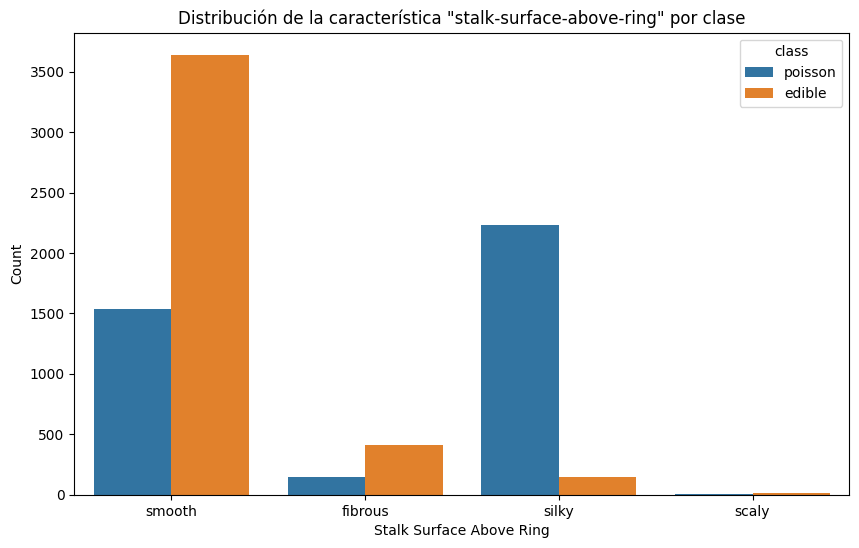

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exploración de la característica 'odor'
plt.figure(figsize=(10, 6))
sns.countplot(x='odor', hue='class', data=mushroom_data)
plt.title('Distribución de la característica "odor" por clase')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.show()

# Exploración de la característica 'gill-size'
plt.figure(figsize=(10, 6))
sns.countplot(x='gill-size', hue='class', data=mushroom_data)
plt.title('Distribución de la característica "gill-size" por clase')
plt.xlabel('Gill Size')
plt.ylabel('Count')
plt.show()

# Exploración de la característica 'stalk-surface-above-ring'
plt.figure(figsize=(10, 6))
sns.countplot(x='stalk-surface-above-ring', hue='class', data=mushroom_data)
plt.title('Distribución de la característica "stalk-surface-above-ring" por clase')
plt.xlabel('Stalk Surface Above Ring')
plt.ylabel('Count')
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Definir el modelo de Random Forest
rf_clf = RandomForestClassifier(random_state=42)

# Realizar validación cruzada estratificada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_clf, X_pca, y, cv=skf)

# Imprimir los resultados de la validación cruzada
print(f"Scores de validación cruzada: {scores}")
print(f"Promedio de validación cruzada: {scores.mean():.4f}")
print(f"Desviación estándar de validación cruzada: {scores.std():.4f}")


Scores de validación cruzada: [1.         0.99938462 1.         0.99876923 0.99938424]
Promedio de validación cruzada: 0.9995
Desviación estándar de validación cruzada: 0.0005


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Implementar K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Exactitud de K-Nearest Neighbors: {accuracy_knn:.4f}")
print("Reporte de clasificación de K-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))
print("Matriz de confusión de K-Nearest Neighbors:")
print(confusion_matrix(y_test, y_pred_knn))

# Implementar Gradient Boosting
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_pca, y_train)
y_pred_gb = gb_clf.predict(X_test_pca)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Exactitud de Gradient Boosting: {accuracy_gb:.4f}")
print("Reporte de clasificación de Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))
print("Matriz de confusión de Gradient Boosting:")
print(confusion_matrix(y_test, y_pred_gb))

# Implementar Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train_pca, y_train)
y_pred_nb = nb_clf.predict(X_test_pca)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Exactitud de Naive Bayes: {accuracy_nb:.4f}")
print("Reporte de clasificación de Naive Bayes:")
print(classification_report(y_test, y_pred_nb))
print("Matriz de confusión de Naive Bayes:")
print(confusion_matrix(y_test, y_pred_nb))

# Validación cruzada estratificada para los nuevos algoritmos

# K-Nearest Neighbors
scores_knn = cross_val_score(knn, X_pca, y, cv=skf)
print(f"Scores de validación cruzada de KNN: {scores_knn}")
print(f"Promedio de validación cruzada de KNN: {scores_knn.mean():.4f}")
print(f"Desviación estándar de validación cruzada de KNN: {scores_knn.std():.4f}")

# Gradient Boosting
scores_gb = cross_val_score(gb_clf, X_pca, y, cv=skf)
print(f"Scores de validación cruzada de Gradient Boosting: {scores_gb}")
print(f"Promedio de validación cruzada de Gradient Boosting: {scores_gb.mean():.4f}")
print(f"Desviación estándar de validación cruzada de Gradient Boosting: {scores_gb.std():.4f}")

# Naive Bayes
scores_nb = cross_val_score(nb_clf, X_pca, y, cv=skf)
print(f"Scores de validación cruzada de Naive Bayes: {scores_nb}")
print(f"Promedio de validación cruzada de Naive Bayes: {scores_nb.mean():.4f}")
print(f"Desviación estándar de validación cruzada de Naive Bayes: {scores_nb.std():.4f}")


Exactitud de K-Nearest Neighbors: 1.0000
Reporte de clasificación de K-Nearest Neighbors:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       843
        True       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Matriz de confusión de K-Nearest Neighbors:
[[843   0]
 [  0 782]]
Exactitud de Gradient Boosting: 0.9994
Reporte de clasificación de Gradient Boosting:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       843
        True       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Matriz de confusión de Gradient Boosting:
[[843   0]
 [  1 781]]
Exactitud de Naive Bayes: 0.9545
Repor

NameError: name 'skf' is not defined

In [17]:
# Separar las características (X) y la variable objetivo (y)
X = mushroom_data_encoded.drop('class_poisonous', axis=1)
y = mushroom_data_encoded['class_poisonous']

# Dividir los datos en conjuntos de entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separar una porción del conjunto de prueba para un test adicional (50/50)
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test1_scaled = scaler.transform(X_test1)
X_test2_scaled = scaler.transform(X_test2)

# Aplicar PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test1_pca = pca.transform(X_test1_scaled)
X_test2_pca = pca.transform(X_test2_scaled)

# Verificar la nueva forma de los datos después de PCA
print(f"Forma original de X: {X.shape}")
print(f"Forma de X después de PCA: {X_train_pca.shape}")

# Verificar la distribución de clases en los conjuntos de entrenamiento y prueba
print("Distribución de clases en el conjunto de entrenamiento:")
print(y_train.value_counts())

print("Distribución de clases en el primer conjunto de prueba:")
print(y_test1.value_counts())

print("Distribución de clases en el segundo conjunto de prueba adicional:")
print(y_test2.value_counts())

# Revisar las correlaciones entre las características y la variable objetivo
corr_matrix = mushroom_data_encoded.corr()
print(corr_matrix['class_poisonous'].sort_values(ascending=False))

# Entrenar y evaluar el modelo en el primer conjunto de prueba
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
y_pred_test1 = knn.predict(X_test1_pca)
accuracy_test1 = accuracy_score(y_test1, y_pred_test1)
print(f"Exactitud de KNN en el primer conjunto de prueba: {accuracy_test1:.4f}")
print("Reporte de clasificación de KNN en el primer conjunto de prueba:")
print(classification_report(y_test1, y_pred_test1))
print("Matriz de confusión de KNN en el primer conjunto de prueba:")
print(confusion_matrix(y_test1, y_pred_test1))

# Evaluar el modelo en el segundo conjunto de prueba adicional
y_pred_test2 = knn.predict(X_test2_pca)
accuracy_test2 = accuracy_score(y_test2, y_pred_test2)
print(f"Exactitud de KNN en el segundo conjunto de prueba adicional: {accuracy_test2:.4f}")
print("Reporte de clasificación de KNN en el segundo conjunto de prueba adicional:")
print(classification_report(y_test2, y_pred_test2))
print("Matriz de confusión de KNN en el segundo conjunto de prueba adicional:")
print(confusion_matrix(y_test2, y_pred_test2))

Forma original de X: (8124, 86)
Forma de X después de PCA: (6499, 50)
Distribución de clases en el conjunto de entrenamiento:
class_poisonous
False    3365
True     3134
Name: count, dtype: int64
Distribución de clases en el primer conjunto de prueba:
class_poisonous
False    413
True     399
Name: count, dtype: int64
Distribución de clases en el segundo conjunto de prueba adicional:
class_poisonous
False    430
True     383
Name: count, dtype: int64
class_poisonous                    1.000000
odor_foul                          0.623842
stalk-surface-above-ring_silky     0.587658
stalk-surface-below-ring_silky     0.573524
gill-size_narrow                   0.540024
                                     ...   
spore-print-color_brown           -0.416645
stalk-surface-below-ring_smooth   -0.425444
stalk-surface-above-ring_smooth   -0.491314
ring-type_pendant                 -0.540469
odor_none                         -0.785557
Name: class_poisonous, Length: 87, dtype: float64
Exactitud d